# Heart Dataset - Homework

    * SVM Classification , Decision Trees Classification and Random Forest Classification

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

from collections import Counter

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Read Dataset

In [2]:
df = pd.read_csv("heart.csv").copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Outlier Detection

In [5]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile Q1
        Q1 = np.percentile(df[c], 25)
        # Q1 = df[c].quantile(0.25)
        # 3st quartile Q3
        Q3 = np.percentile(df[c], 75)
        # Q3 = df[c].quantile(0.75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [6]:
df.loc[detect_outliers(df, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [8]:
# Featureslarda 1 den fazla Outlier mevcut değil.
# Features do not have outlier values more than one

### Missing Values

In [9]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
# Features do not have missing values.

# Visulazations

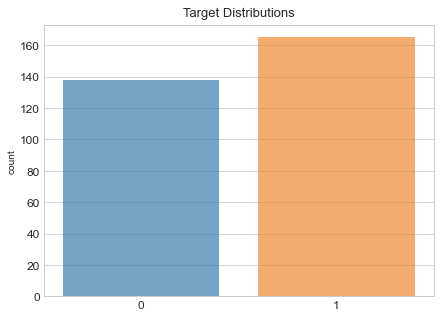

In [11]:
plt.figure(figsize= (7,5))
sns.countplot(x= df["target"], alpha = 0.65, saturation= 0.85)
plt.title("Target Distributions", size= 13, y= 1.01)
plt.xlabel("")
plt.tick_params(axis = "both", labelsize= 12)
plt.show()

In [12]:
# print skewness of each attribute
for (colName, colData) in df[df.drop(columns = "target").columns].iteritems():
    print("Feature name: {0}, Skewness: {1}".format(colName, stats.skew(colData)))

Feature name: age, Skewness: -0.2014596901125439
Feature name: sex, Skewness: -0.7874122909518428
Feature name: cp, Skewness: 0.4823293961332623
Feature name: trestbps, Skewness: 0.7102300604861443
Feature name: chol, Skewness: 1.1377326187082244
Feature name: fbs, Skewness: 1.976803464683451
Feature name: restecg, Skewness: 0.1617165704075642
Feature name: thalach, Skewness: -0.5347455419075503
Feature name: exang, Skewness: 0.7388505791113107
Feature name: oldpeak, Skewness: 1.2634255245891595
Feature name: slope, Skewness: -0.5057957274757736
Feature name: ca, Skewness: 1.303925955673585
Feature name: thal, Skewness: -0.47435893118696904


In [13]:
# print kurtosis of each attribute
for (colName, colData) in df[df.drop(columns = "target").columns].iteritems():
    print("Feature name: {0}, Kurtosis: {1}".format(colName, stats.kurtosis(colData)))

Feature name: age, Kurtosis: -0.55299857127345
Feature name: sex, Kurtosis: -1.3799818840579707
Feature name: cp, Kurtosis: -1.1932109350319449
Feature name: trestbps, Kurtosis: 0.8940569555069118
Feature name: chol, Kurtosis: 4.411682119729873
Feature name: fbs, Kurtosis: 1.9077519379844965
Feature name: restecg, Kurtosis: -1.3600274409622233
Feature name: thalach, Kurtosis: -0.08068888039194055
Feature name: exang, Kurtosis: -1.4540998217468801
Feature name: oldpeak, Kurtosis: 1.5301925815010025
Feature name: slope, Kurtosis: -0.6369501947346548
Feature name: ca, Kurtosis: 0.8057311214832796
Feature name: thal, Kurtosis: 0.2732845857908739


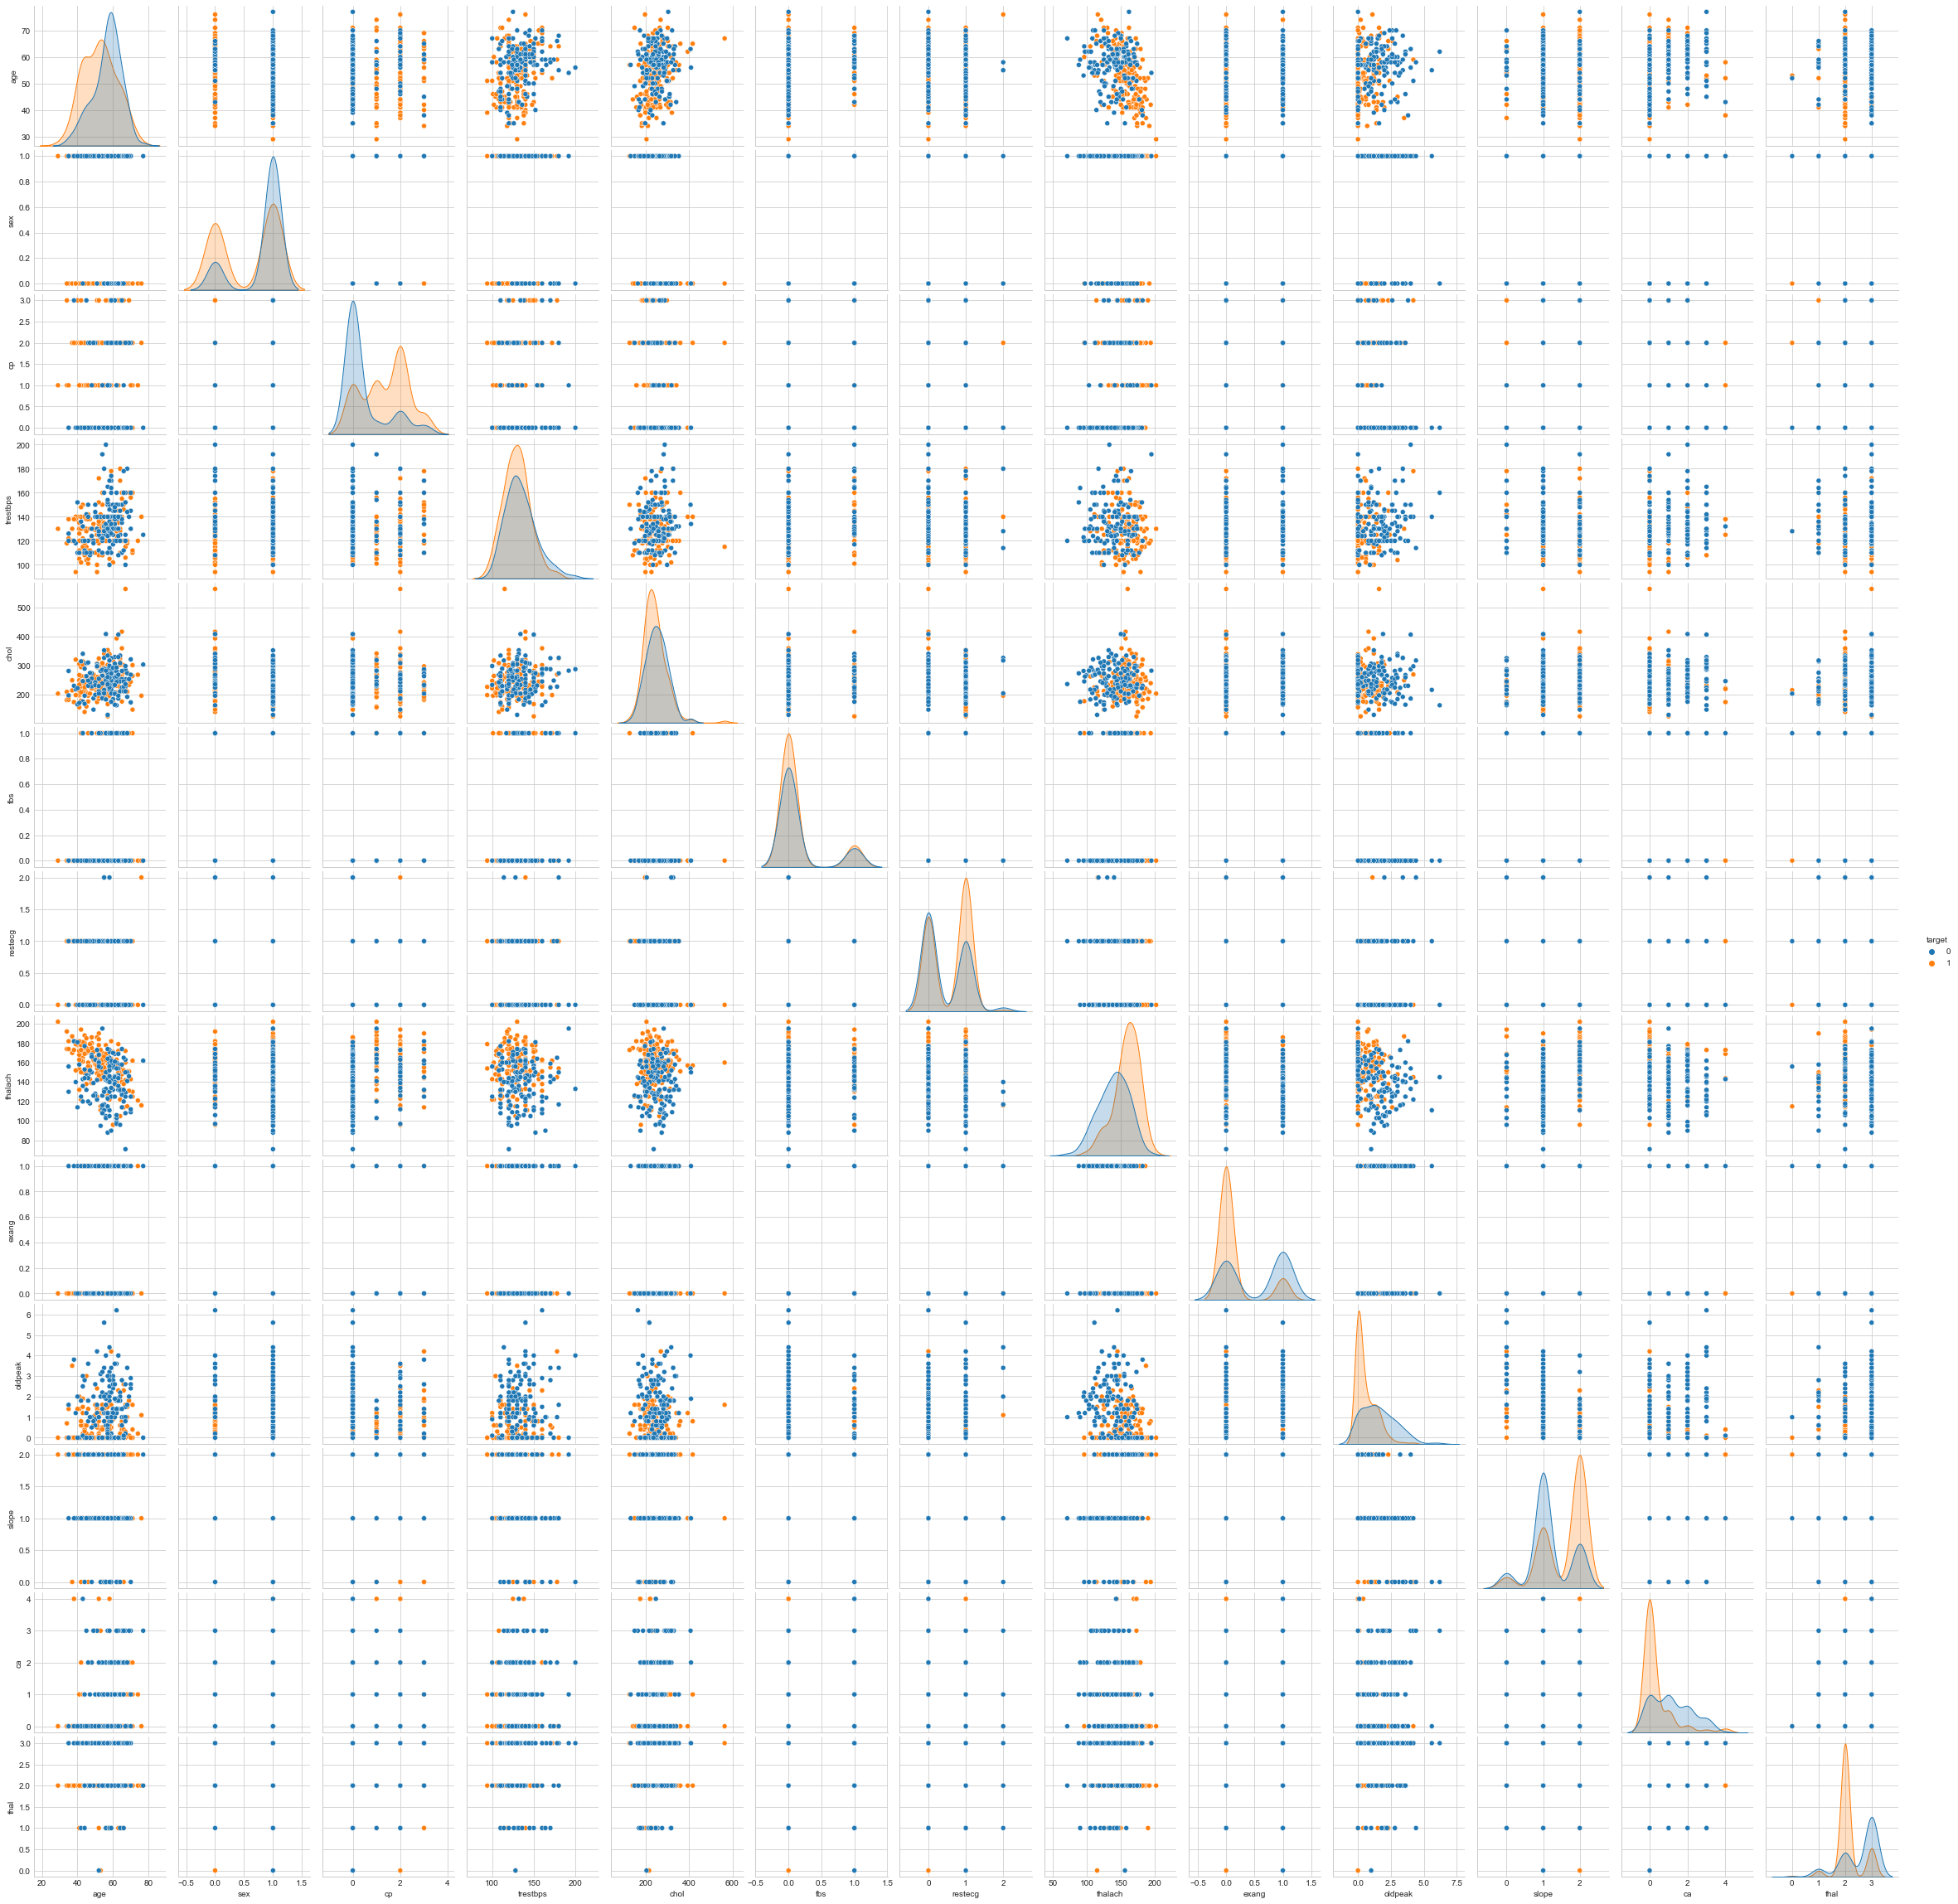

In [14]:
sns.pairplot(df, hue = "target")
plt.show()

In [15]:
def plot_hist(variable):
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

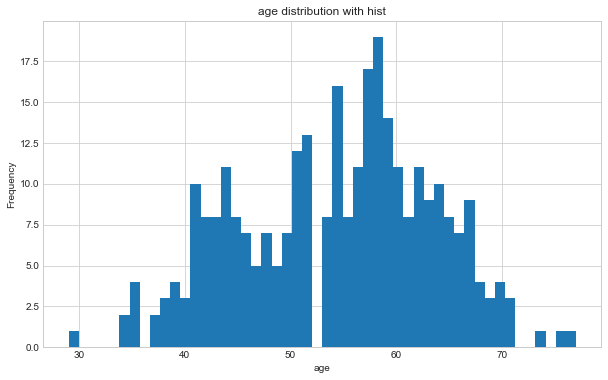

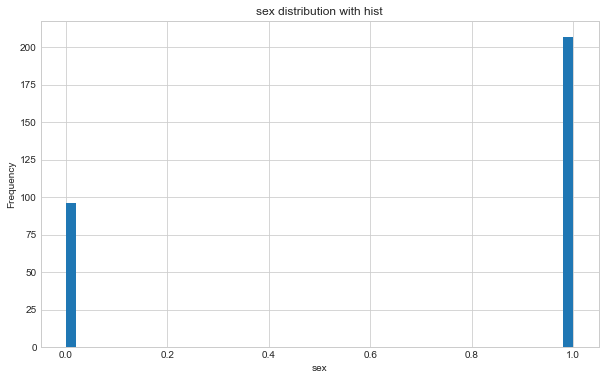

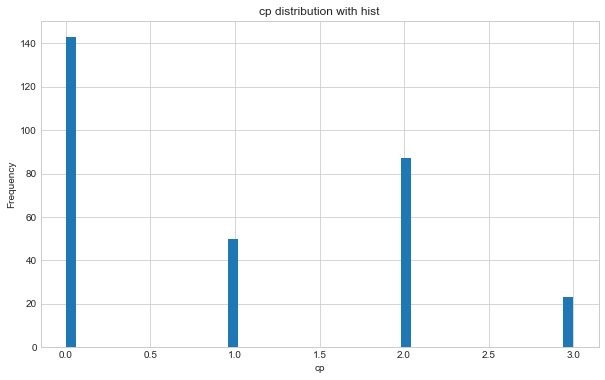

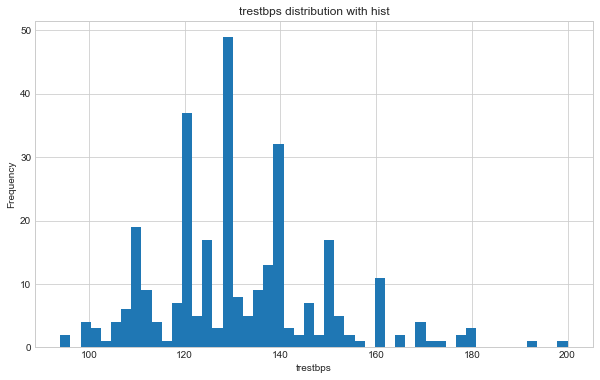

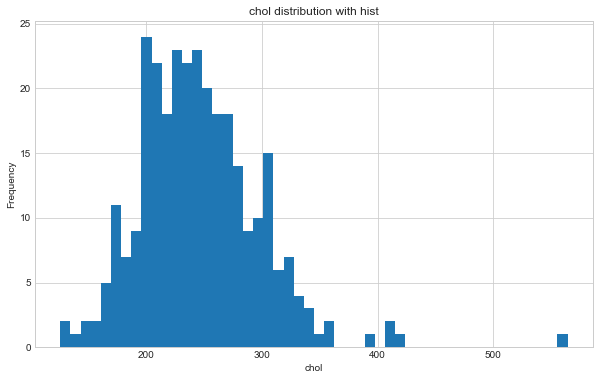

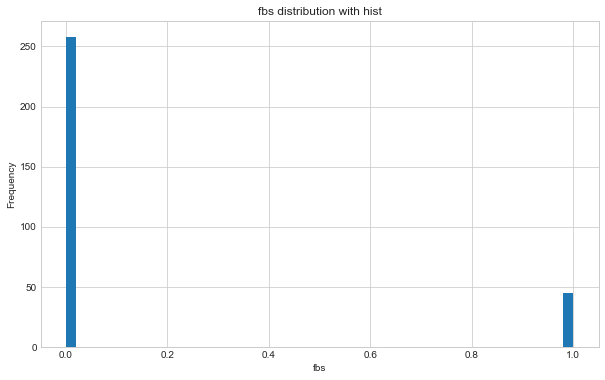

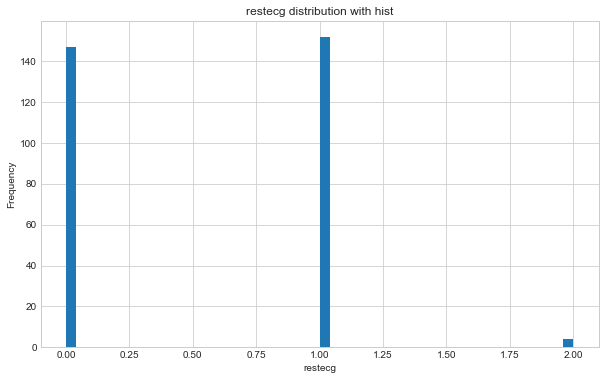

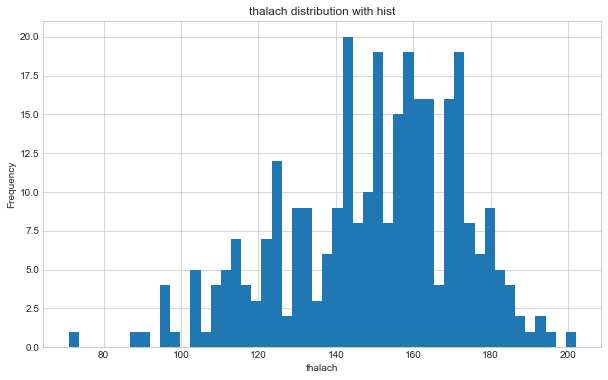

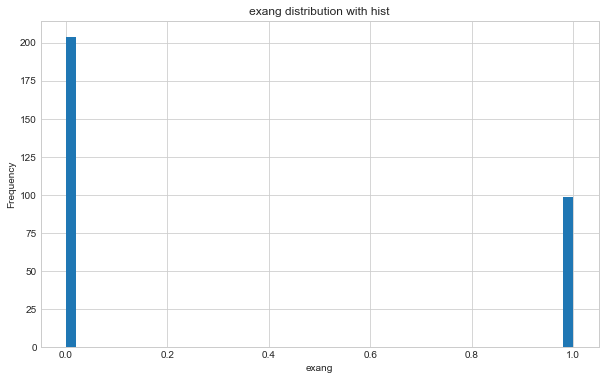

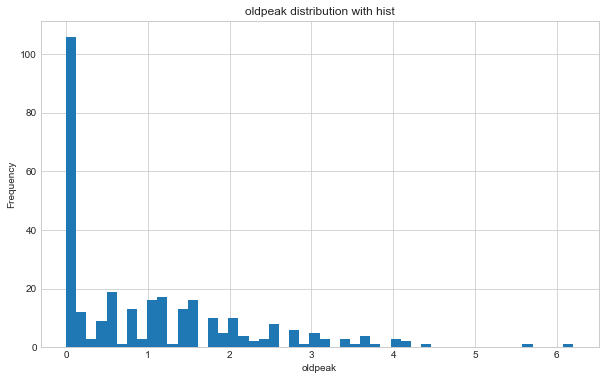

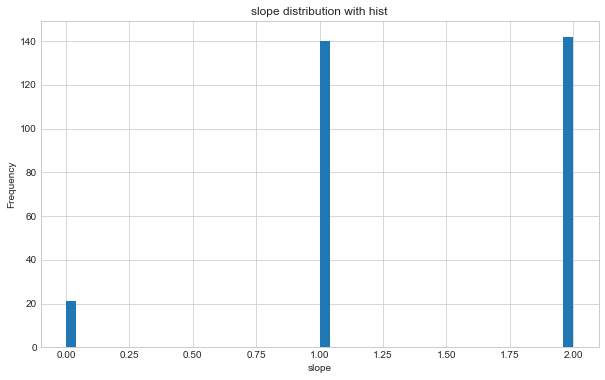

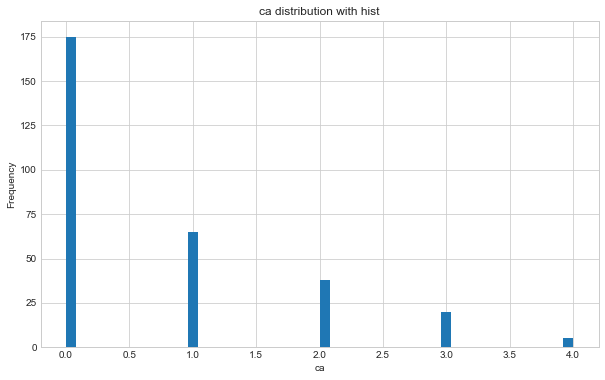

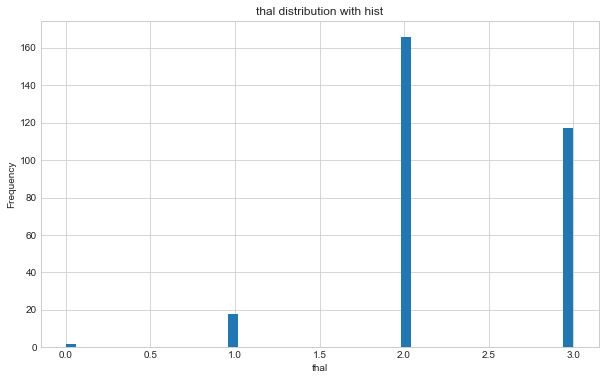

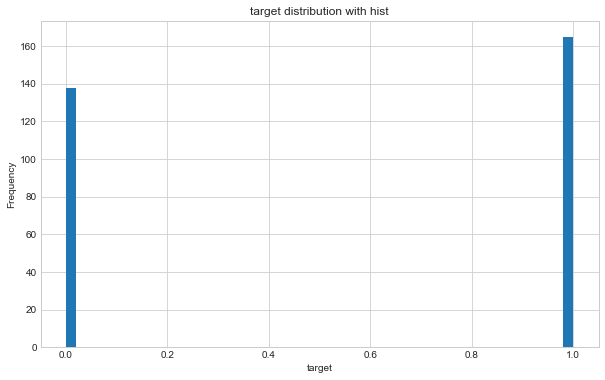

In [16]:
numericVar = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for n in numericVar:
    plot_hist(n)

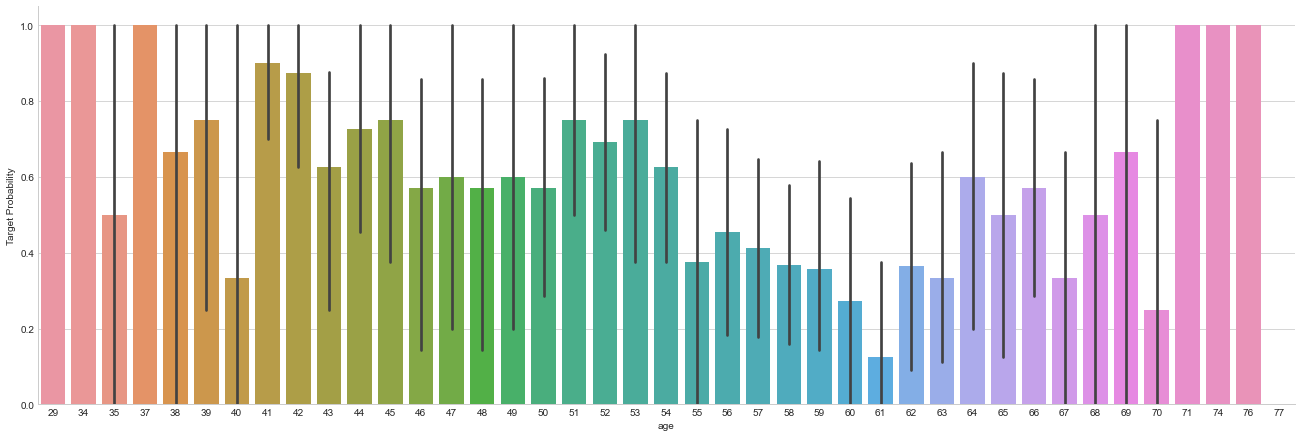

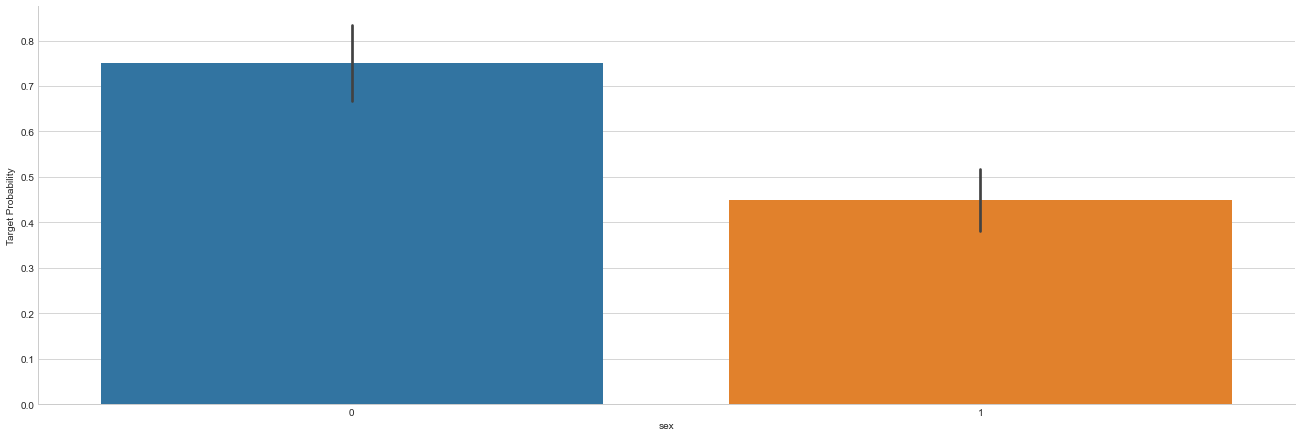

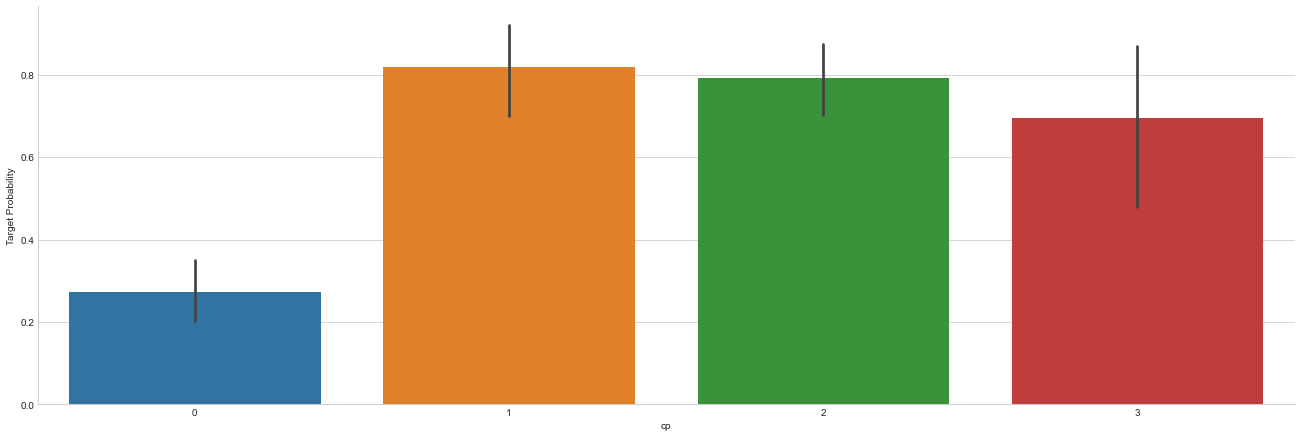

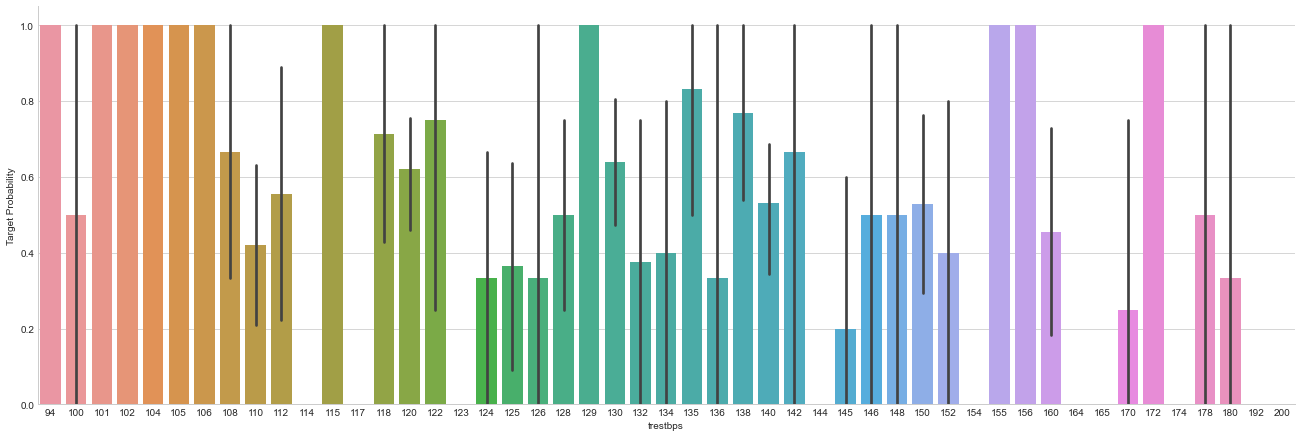

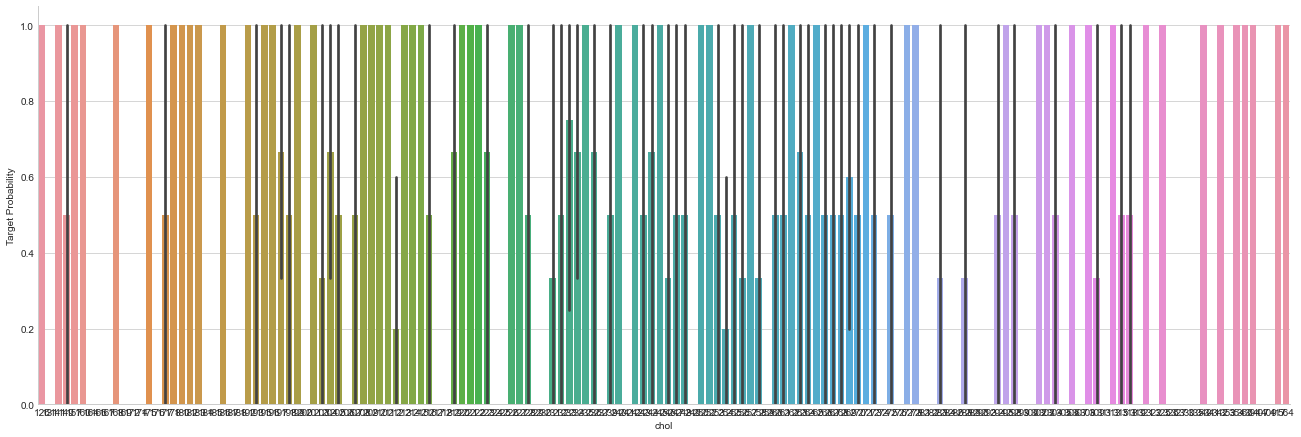

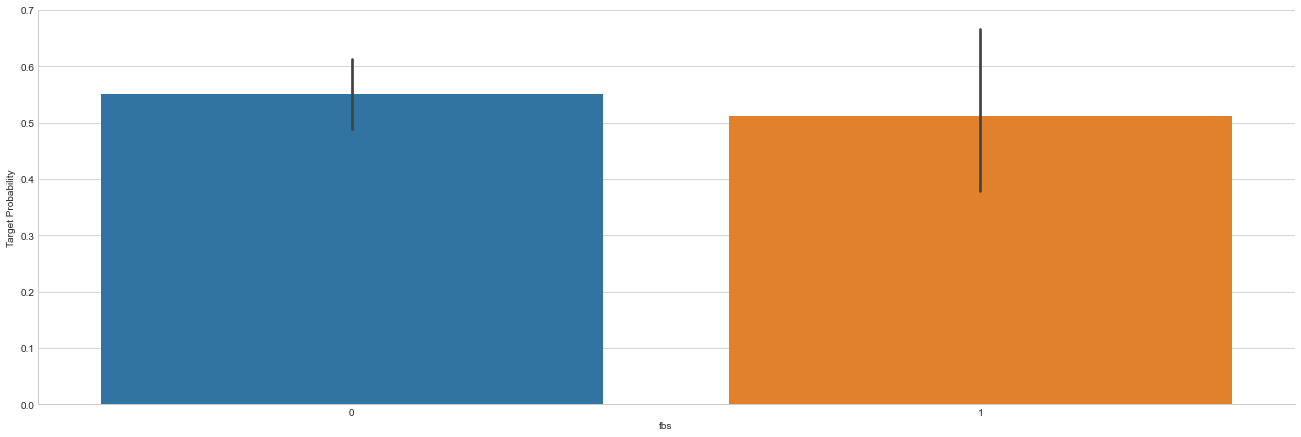

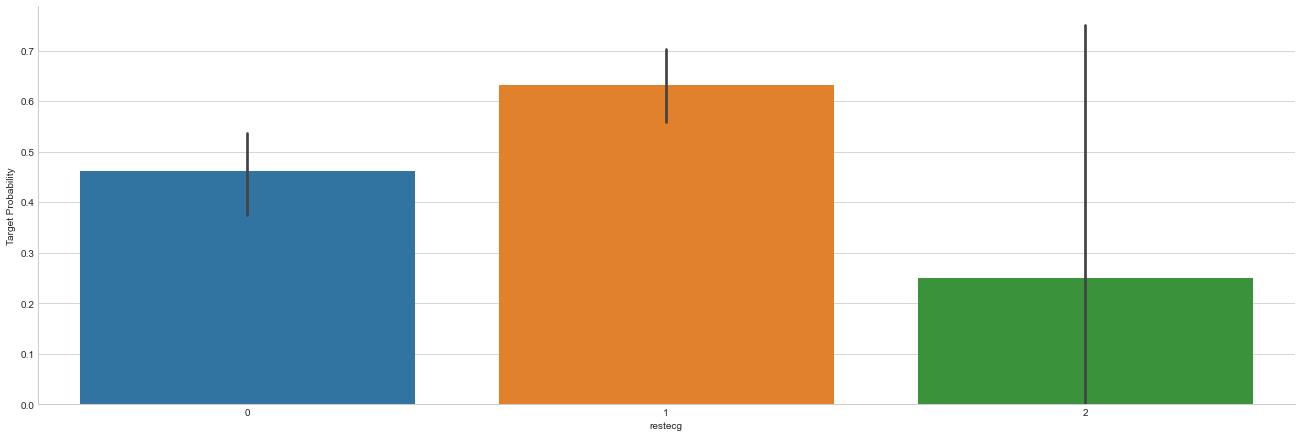

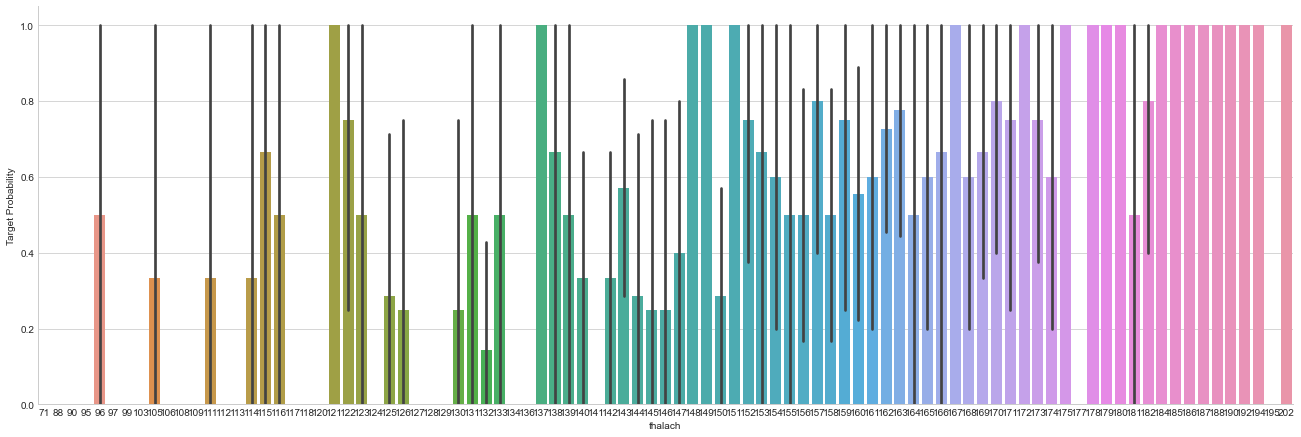

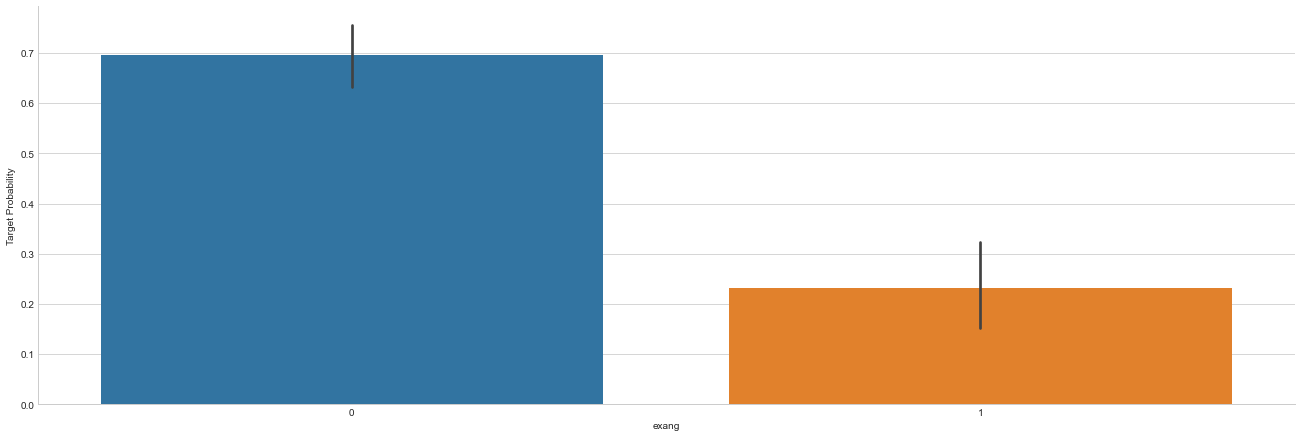

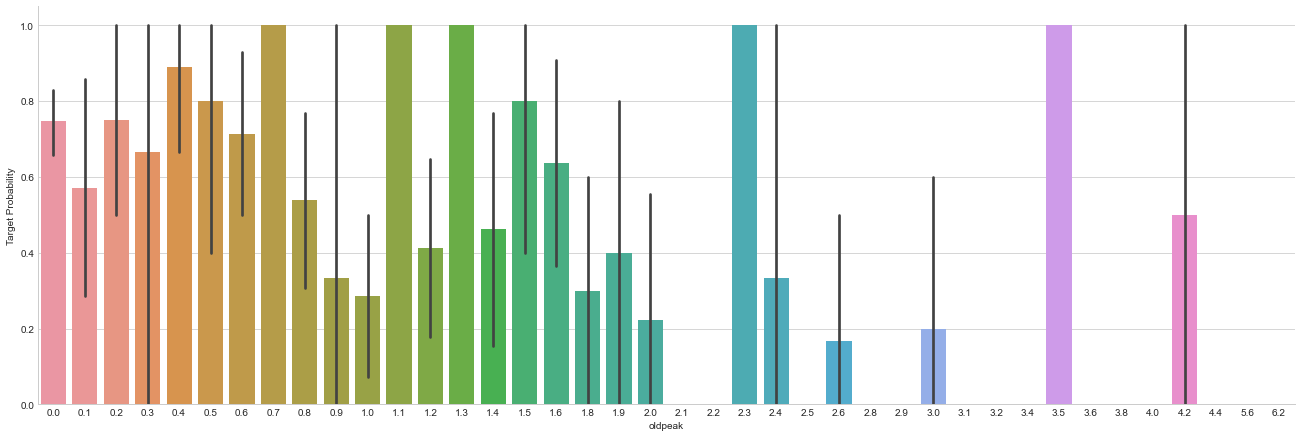

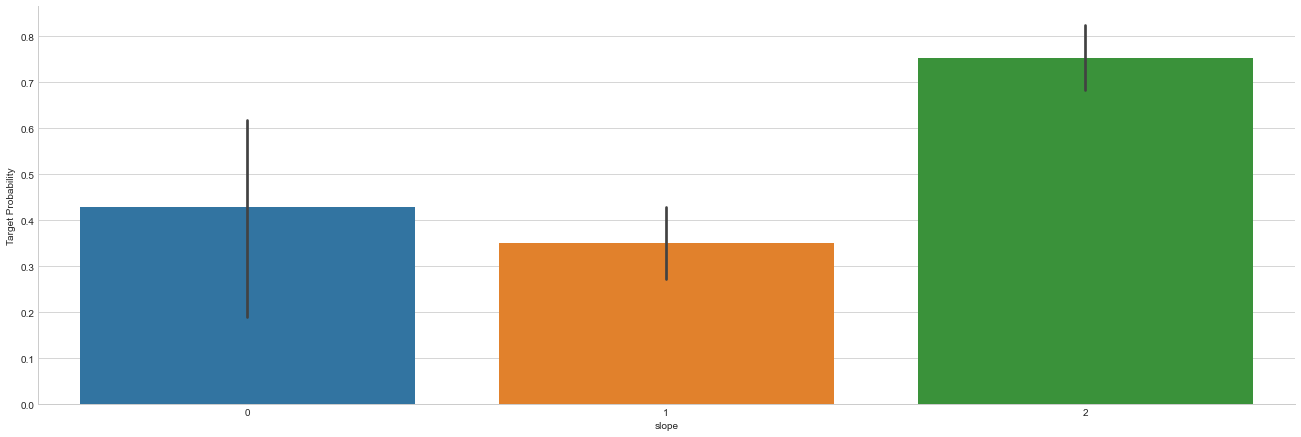

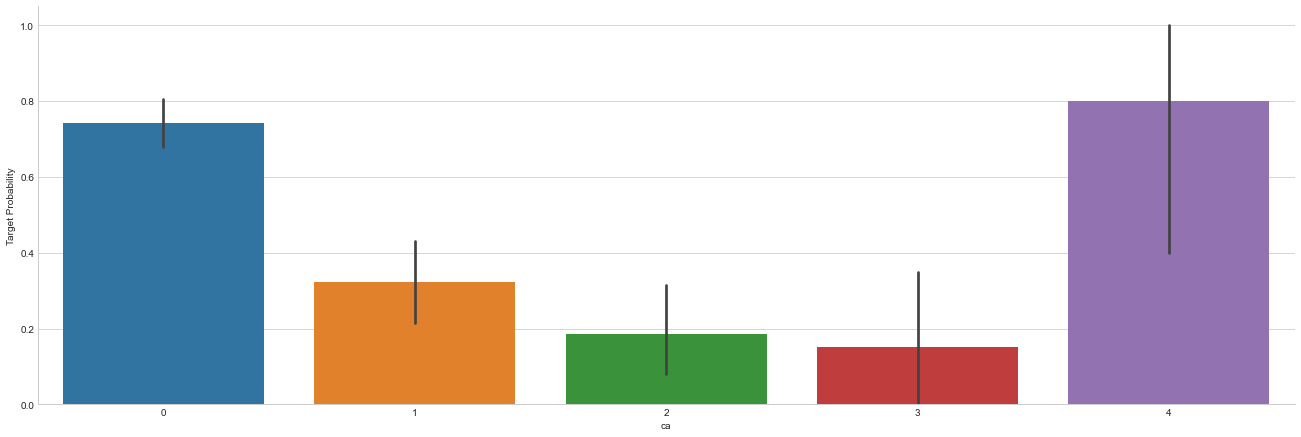

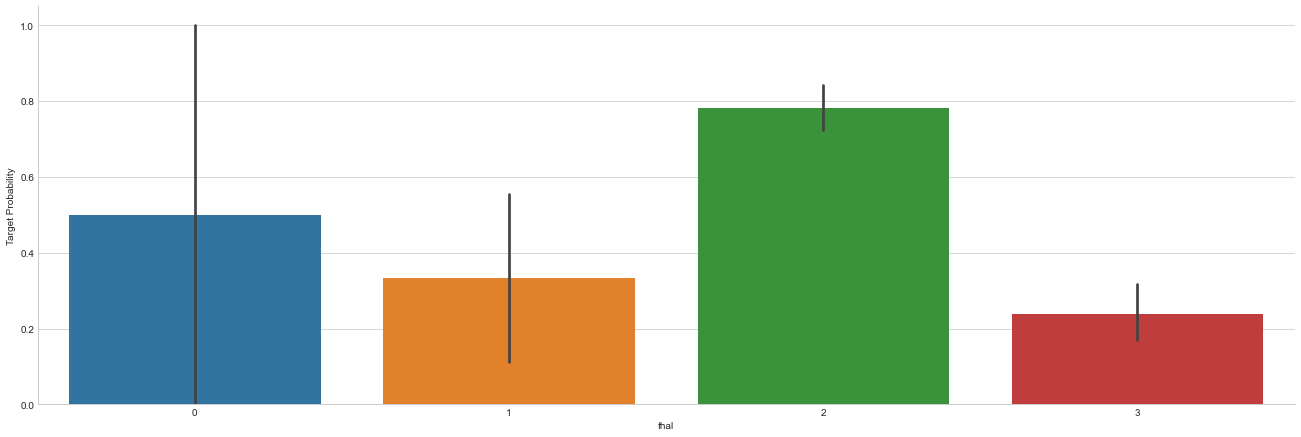

In [17]:
for i in df.drop("target", axis = 1).columns:
    g = sns.factorplot( x = i, y = "target", data = df, kind = "bar", size = 6, aspect=3)
    g.set_ylabels("Target Probability")
    plt.show()

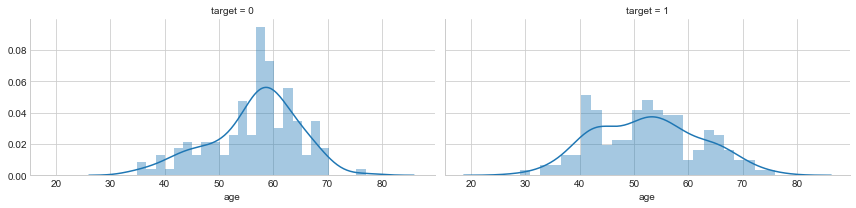

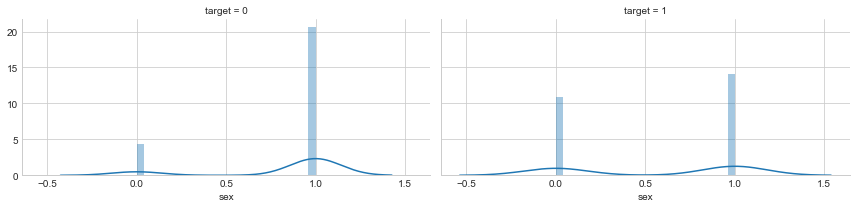

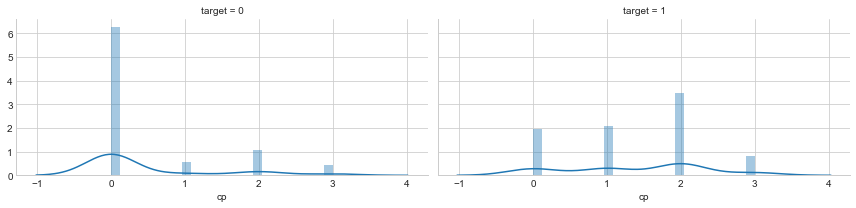

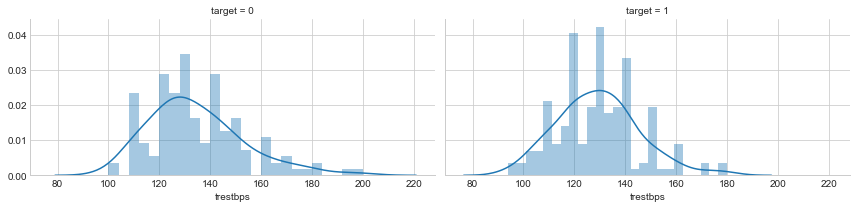

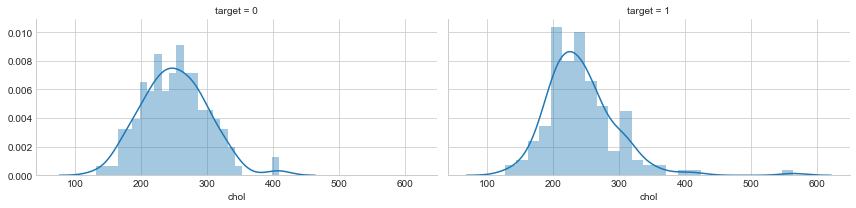

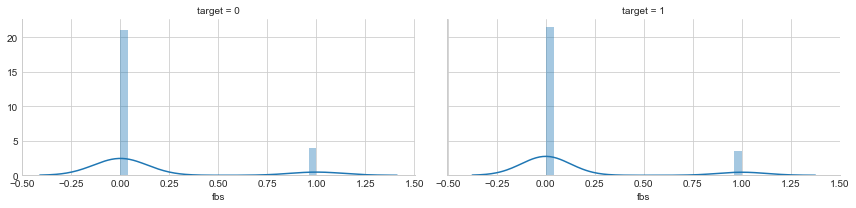

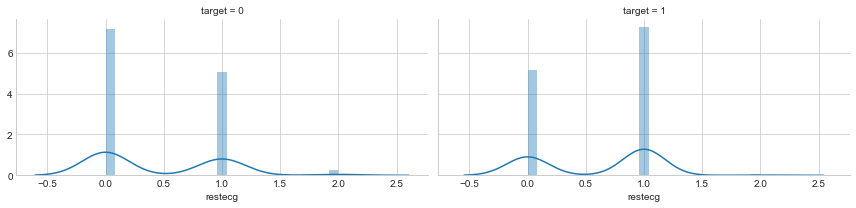

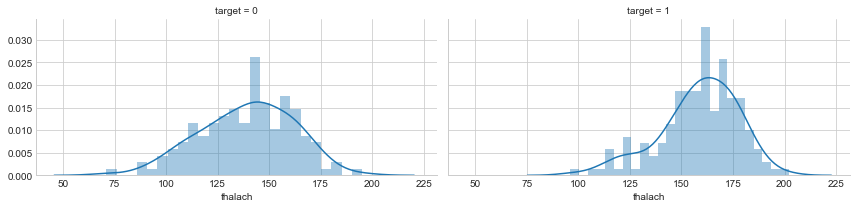

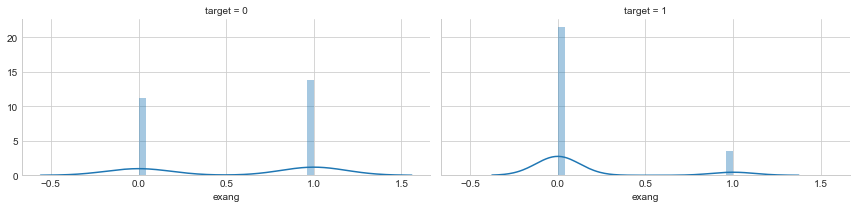

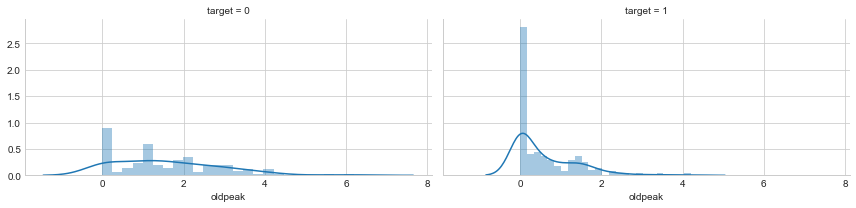

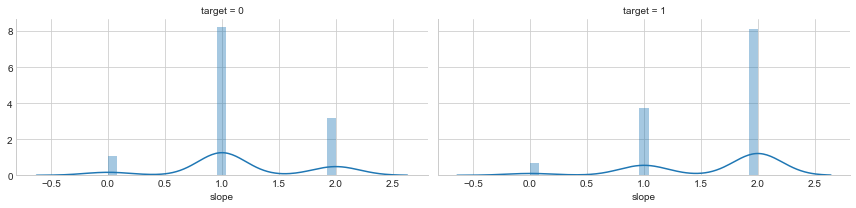

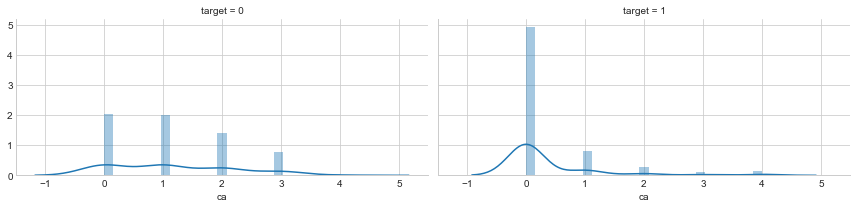

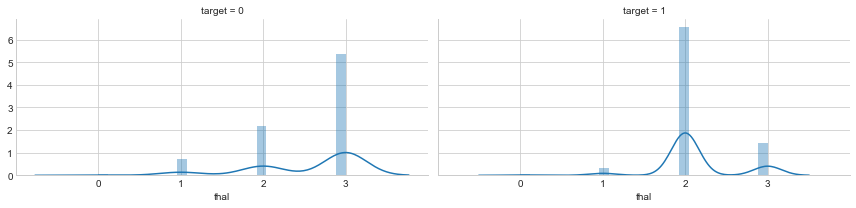

In [19]:
for i in df.drop("target", axis = 1).columns:
    g = sns.FacetGrid(df, col = "target", size = 3, aspect=2)
    g.map(sns.distplot, i, bins= 25)
    plt.show()

# Statistical Analysis

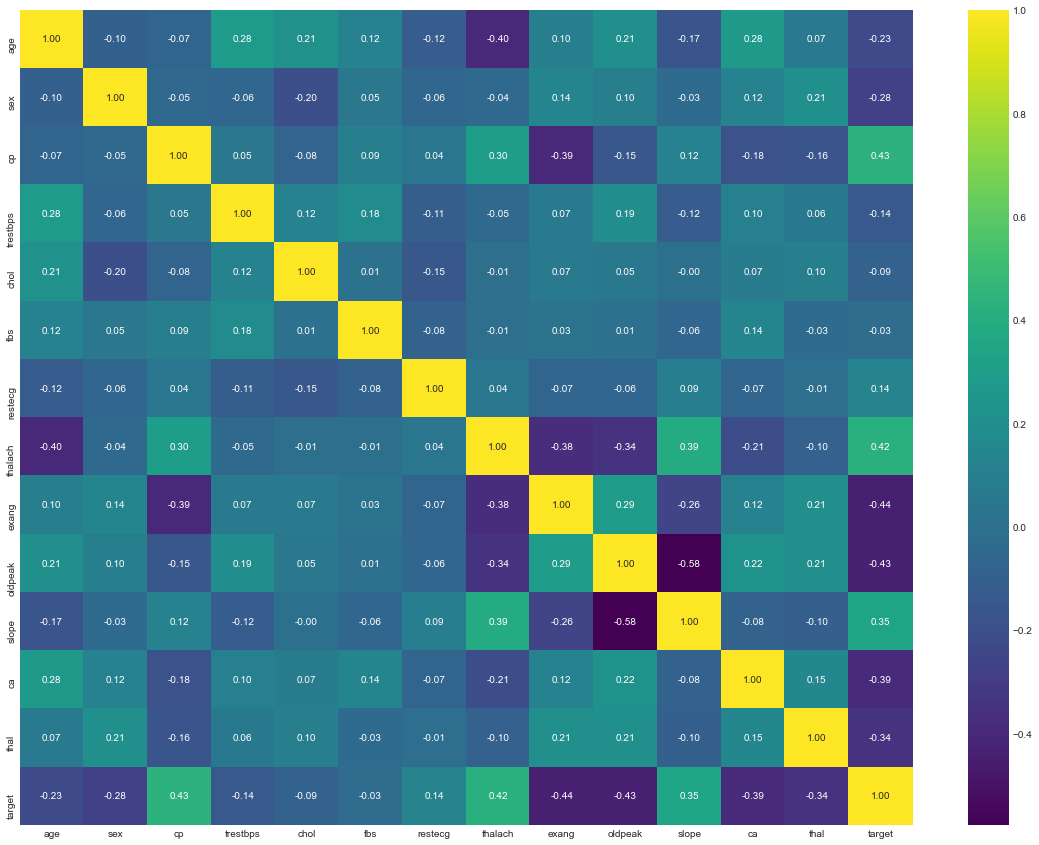

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "viridis");

In [21]:
df_cor = df.corr()["target"]
df_cor.sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<AxesSubplot:>

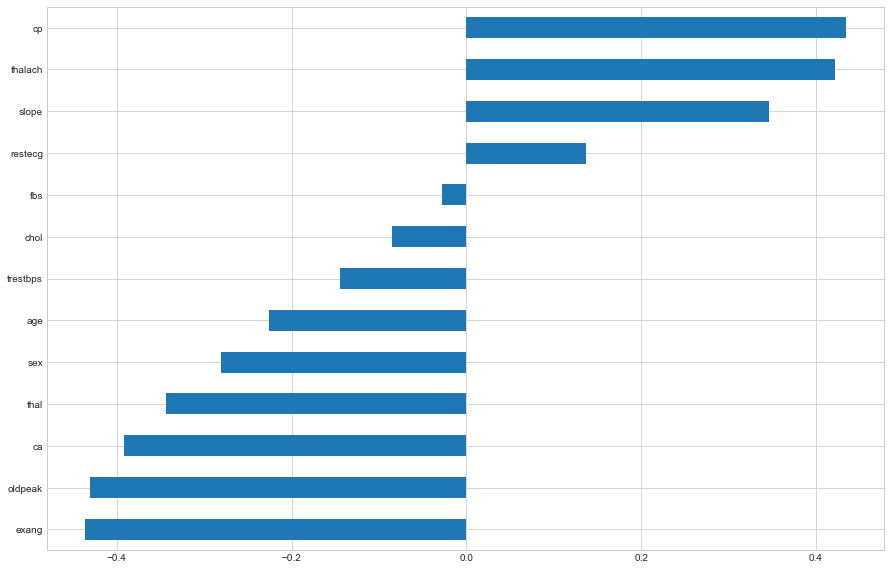

In [23]:
plt.subplots(figsize=(15,10))
df.corr()['target'].drop('target').sort_values().plot.barh()

# Determine Dependent and Independent Variables

In [24]:
X = df.drop("target", axis = 1)
y = df.target

In [25]:
print(df.target.value_counts()) 
print("")
print(round(df.target.value_counts(normalize=True),2))

1    165
0    138
Name: target, dtype: int64

1    0.54
0    0.46
Name: target, dtype: float64


In [26]:
# Dependent variable(Target - Label) is not Unbalanced.

# Scaling the Data

In [27]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# 1. SVM Classification (SVC)

## Train - Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 35)

In [30]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (212, 13)
X_test : (91, 13)
y_train : (212,)
y_test : (91,)


## Model Fitting and Compare Actual and Predicted Labels

In [31]:
from sklearn.svm import SVC, LinearSVC

In [32]:
svc_model = SVC().fit(X_train, y_train)
svc_model

SVC()

In [33]:
y_pred = svc_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [34]:
y_train_pred = svc_model.predict(X_train)
y_train_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [35]:
my_dict = {"Actual": y_test, "Pred": y_pred}

In [36]:
comparing = pd.DataFrame.from_dict(my_dict).sample(10)
comparing                                                   

,Actual,Pred
10,1,1
198,0,0
3,1,1
61,1,1
68,1,1
143,1,1
78,1,1
272,0,0
219,0,0
97,1,0


## Error Metrics

In [37]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [38]:
print(confusion_matrix(y_test, y_pred))

[[34  8]
 [10 39]]


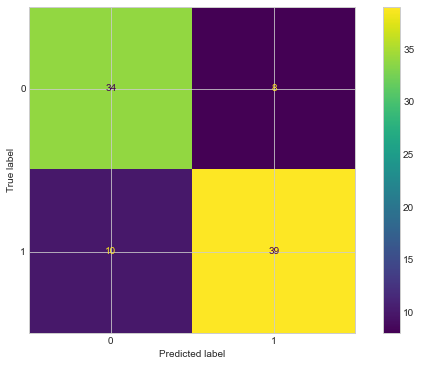

In [39]:
plot_confusion_matrix(svc_model, X_test, y_test);

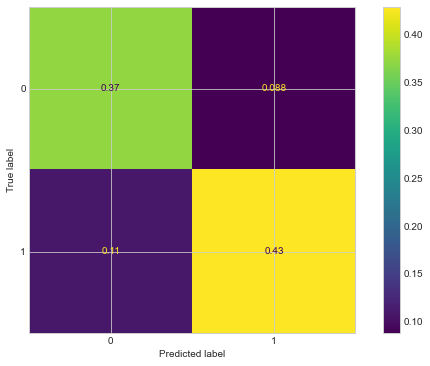

In [40]:
plot_confusion_matrix(svc_model, X_test, y_test, normalize= "all")

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.83      0.80      0.81        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [42]:

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91        96
           1       0.90      0.97      0.93       116

    accuracy                           0.92       212
   macro avg       0.93      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212



In [43]:
def eval_metrics(actual,pred, model_type):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print(f"Model {model_type} performance")
    print("-------------------------")
    print(f'Accuracy \t\t: {acs}')
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
    

In [44]:
print(eval_metrics(y_train, y_train_pred, "TRAINING"))
print("")
print(eval_metrics(y_test, y_pred, "TESTING"))

Model TRAINING performance
-------------------------
Accuracy 		: 0.9198113207547169
f1_score 		: 0.9294605809128631
Precision 		: 0.896
Recall 			: 0.9655172413793104
None

Model TESTING performance
-------------------------
Accuracy 		: 0.8021978021978022
f1_score 		: 0.8125
Precision 		: 0.8297872340425532
Recall 			: 0.7959183673469388
None


In [45]:
svc_scores = {
    "svc_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "svc_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

svc =pd.DataFrame(svc_scores)
svc

,svc_train,svc_test
accuracy,0.919811,0.802198
precision,0.896000,0.829787
recall,0.965517,0.795918
f1_score,0.929461,0.812500


## GridSearch

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
#param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4]}
#param_grid = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100], "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}
param_grid = {'C':[0.001,0.01,0.1,0.5,1,2,3,4,5,6,7,8,9,10], 'kernel':['linear','rbf','poly'], 'gamma':['scale','auto']}

In [48]:
model = SVC()

In [49]:
svc_grid_model = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 3, refit =True, cv = 10)

In [50]:
svc_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                               10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [51]:
print ('The Best score (R2):', svc_grid_model.best_score_)
print("The Best Paremeters: " + str(svc_grid_model.best_params_))

The Best score (R2): 0.8586580086580087
The Best Paremeters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [52]:
list(svc_grid_model.best_params_.values())[0]

1

In [53]:
list(svc_grid_model.best_params_.values())[1]

'scale'

In [54]:
list(svc_grid_model.best_params_.values())[2]

'rbf'

## Final Model

In [55]:
svc_final_model = SVC(C = list(svc_grid_model.best_params_.values())[0],
                      gamma = list(svc_grid_model.best_params_.values())[1],                      
                      kernel = list(svc_grid_model.best_params_.values())[2] ).fit(X_train, y_train)
svc_final_model.fit(X_train, y_train)

SVC(C=1)

In [56]:
y_pred = svc_final_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [57]:
y_train_pred = svc_final_model.predict(X_train)
y_train_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Error Metrics

In [58]:
def eval_metrics(actual,pred, model_type):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print(f"Model {model_type} performance")
    print("-------------------------")
    print(f'Accuracy \t\t: {acs}')
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
   

In [59]:
print(eval_metrics(y_train, y_train_pred, "GRİD TRAINING"))
print("")
print(eval_metrics(y_test, y_pred, "GRİD TESTING"))

Model GRİD TRAINING performance
-------------------------
Accuracy 		: 0.9198113207547169
f1_score 		: 0.9294605809128631
Precision 		: 0.896
Recall 			: 0.9655172413793104
None

Model GRİD TESTING performance
-------------------------
Accuracy 		: 0.8021978021978022
f1_score 		: 0.8125
Precision 		: 0.8297872340425532
Recall 			: 0.7959183673469388
None


In [60]:
svc_grid_scores = {
    "svc_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "svc_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

svc_grid =pd.DataFrame(svc_grid_scores)
svc_grid

,svc_grid_train,svc_grid_test
accuracy,0.919811,0.802198
precision,0.896000,0.829787
recall,0.965517,0.795918
f1_score,0.929461,0.812500


In [61]:
def eval_metrics(actual,pred, model_type):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print(f"Model {model_type} performance")
    print("-------------------------")
    print(f'Accuracy \t\t: {acs}')
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
    
print(eval_metrics(y_train, y_train_pred, "GRİD TRAINING"))
print("")
print(eval_metrics(y_test, y_pred, "GRİD TESTING"))

svc_grid_scores = {
    "svc_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "svc_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

svc_grid =pd.DataFrame(svc_grid_scores)
svc_grid

Model GRİD TRAINING performance
-------------------------
Accuracy 		: 0.9198113207547169
f1_score 		: 0.9294605809128631
Precision 		: 0.896
Recall 			: 0.9655172413793104
None

Model GRİD TESTING performance
-------------------------
Accuracy 		: 0.8021978021978022
f1_score 		: 0.8125
Precision 		: 0.8297872340425532
Recall 			: 0.7959183673469388
None


,svc_grid_train,svc_grid_test
accuracy,0.919811,0.802198
precision,0.896000,0.829787
recall,0.965517,0.795918
f1_score,0.929461,0.812500


## Evaluate Model

In [62]:
pd.concat([svc, svc_grid], axis = 1)

,svc_train,svc_test,svc_grid_train,svc_grid_test
accuracy,0.919811,0.802198,0.919811,0.802198
precision,0.896000,0.829787,0.896000,0.829787
recall,0.965517,0.795918,0.965517,0.795918
f1_score,0.929461,0.812500,0.929461,0.812500


# 2. Decision Trees Classification

## Train - Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 35)

In [65]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (212, 13)
X_test : (91, 13)
y_train : (212,)
y_test : (91,)


## Model Fitting and Compare Actual and Predicted Labels

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model = DecisionTreeClassifier(criterion= "gini", min_samples_split= 2)

In [68]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
y_pred = dt_model.predict(X_test)

In [70]:
y_train_pred = dt_model.predict(X_train)

In [71]:
# print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

In [72]:
my_dict = {"Actual": y_test, "Pred": y_pred}

In [73]:
comparing = pd.DataFrame.from_dict(my_dict).sample(10)
comparing                                                   

,Actual,Pred
205,0,0
92,1,1
83,1,1
106,1,1
299,0,1
251,0,0
292,0,0
94,1,1
179,0,0
143,1,1


## Error Metrics

In [74]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [75]:
print(confusion_matrix(y_test, y_pred))

[[35  7]
 [17 32]]


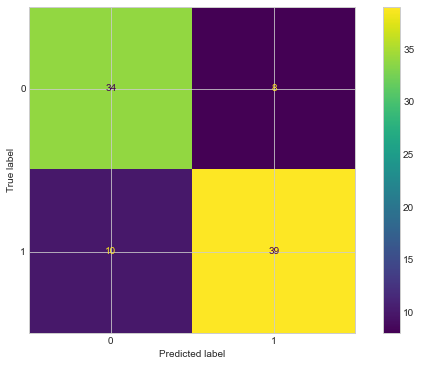

In [76]:
plot_confusion_matrix(svc_model, X_test, y_test);

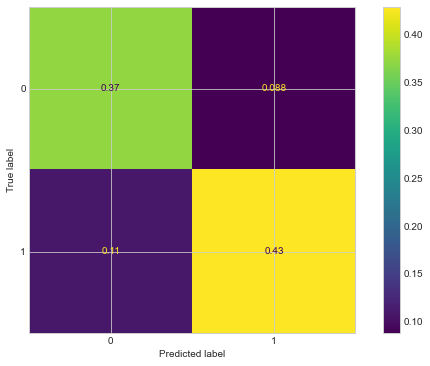

In [77]:
plot_confusion_matrix(svc_model, X_test, y_test, normalize= "all")

In [78]:
print("Classification Report TEST Data:\n", classification_report(y_test, y_pred))

Classification Report TEST Data:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        42
           1       0.82      0.65      0.73        49

    accuracy                           0.74        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91



In [79]:
print("Classification Report TRAIN Data:\n", classification_report(y_train, y_train_pred))

Classification Report TRAIN Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       116

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [80]:
def eval_metrics(actual,pred, model_type):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print(f"Model {model_type} performance")
    print("-------------------------")
    print(f'Accuracy \t\t: {acs}')
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
    
print(eval_metrics(y_train, y_train_pred, "TRAINING"))
print("")
print(eval_metrics(y_test, y_pred, "TESTING"))

dt_scores = {
    "dt_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "dt_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

dt =pd.DataFrame(dt_scores)
dt

Model TRAINING performance
-------------------------
Accuracy 		: 1.0
f1_score 		: 1.0
Precision 		: 1.0
Recall 			: 1.0
None

Model TESTING performance
-------------------------
Accuracy 		: 0.7362637362637363
f1_score 		: 0.7272727272727272
Precision 		: 0.8205128205128205
Recall 			: 0.6530612244897959
None


,dt_train,dt_test
accuracy,1.0,0.736264
precision,1.0,0.820513
recall,1.0,0.653061
f1_score,1.0,0.727273


## GridSearch

In [81]:
from sklearn.model_selection import GridSearchCV
# param_grid = {"max_depth": range(1,10), "min_samples_split" : list(range(2,50)) }
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": range(1,10),
              "min_samples_split" : list(range(2,50))
             }

model = DecisionTreeClassifier()
dt_grid_model = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 3, refit =True, cv = 10)
dt_grid_model.fit(X_train, y_train)

print("")
print ('The Best score (R2):', dt_grid_model.best_score_)
print("The Best Paremeters: " + str(dt_grid_model.best_params_))

Fitting 10 folds for each of 864 candidates, totalling 8640 fits

The Best score (R2): 0.8019480519480519
The Best Paremeters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}


## Final Model

In [82]:
list(dt_grid_model.best_params_.values())[0]

'gini'

In [83]:
list(dt_grid_model.best_params_.values())[1]

3

In [84]:
list(dt_grid_model.best_params_.values())[2]

10

In [85]:
dt_final_model = DecisionTreeClassifier(criterion = list(dt_grid_model.best_params_.values())[0],
                            max_depth = list(dt_grid_model.best_params_.values())[1], 
                            min_samples_split = list(dt_grid_model.best_params_.values())[2])
dt_final_model.fit(X_train, y_train)

y_pred = dt_final_model.predict(X_test)
y_train_pred = dt_final_model.predict(X_train)

In [87]:
#!pip install skompiler

  Using cached SKompiler-0.6-py3-none-any.whl


In [88]:
from skompiler import skompile
print(skompile(dt_final_model.predict).to("python/code"))

(((1 if x[12] <= 0.30505356192588806 else 0) if x[11] <= 
    -0.2246733158826828 else 0 if x[9] <= -0.5517835021018982 else 0) if x[
    2] <= -0.4532417170703411 else (1 if x[0] <= 0.12503040209412575 else 1
    ) if x[9] <= 0.7853946387767792 else 0 if x[7] <= 0.6932656168937683 else 1
    )



## Error Metrics

In [89]:
def eval_metrics(actual,pred, model_type):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print(f"Model {model_type} performance")
    print("-------------------------")
    print(f'Accuracy \t\t: {acs}')
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
    
print(eval_metrics(y_train, y_train_pred, "GRİD TRAINING"))
print("")
print(eval_metrics(y_test, y_pred, "GRİD TESTING"))

dt_grid_scores = {
    "dt_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "dt_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

dt_grid =pd.DataFrame(dt_grid_scores)
dt_grid
   

Model GRİD TRAINING performance
-------------------------
Accuracy 		: 0.8537735849056604
f1_score 		: 0.8764940239043825
Precision 		: 0.8148148148148148
Recall 			: 0.9482758620689655
None

Model GRİD TESTING performance
-------------------------
Accuracy 		: 0.8131868131868132
f1_score 		: 0.8316831683168318
Precision 		: 0.8076923076923077
Recall 			: 0.8571428571428571
None


,dt_grid_train,dt_grid_test
accuracy,0.853774,0.813187
precision,0.814815,0.807692
recall,0.948276,0.857143
f1_score,0.876494,0.831683


## Evaluate Model

In [90]:
pd.concat([svc_grid, dt_grid, ], axis = 1)

,svc_grid_train,svc_grid_test,dt_grid_train,dt_grid_test
accuracy,0.919811,0.802198,0.853774,0.813187
precision,0.896000,0.829787,0.814815,0.807692
recall,0.965517,0.795918,0.948276,0.857143
f1_score,0.929461,0.812500,0.876494,0.831683


# 3. Random Forest Classification

## Train - Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 35)

In [93]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (212, 13)
X_test : (91, 13)
y_train : (212,)
y_test : (91,)


## Model Fitting and Compare Actual and Predicted Labels

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators= 10, 
                               max_features = "auto",
                               random_state= 42)

In [95]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [96]:
y_pred = rf_model.predict(X_test)

In [97]:
y_train_pred = rf_model.predict(X_train)

In [98]:
my_dict = {"Actual": y_test, "Pred": y_pred}

In [99]:
comparing = pd.DataFrame.from_dict(my_dict).sample(10)
comparing                                                   

,Actual,Pred
104,1,1
22,1,1
212,0,0
10,1,0
256,0,0
269,0,0
264,0,0
138,1,0
263,0,0
211,0,0


## Error Metrics

In [100]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [101]:
print(confusion_matrix(y_test, y_pred))

[[36  6]
 [16 33]]


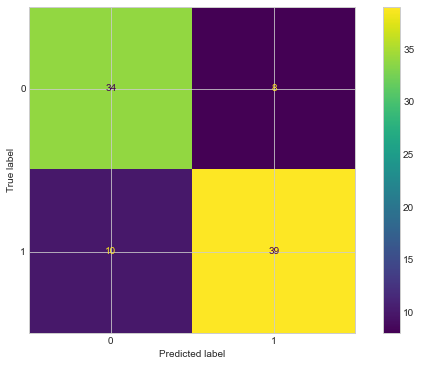

In [102]:
plot_confusion_matrix(svc_model, X_test, y_test);

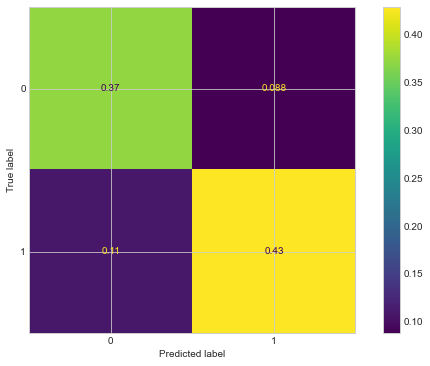

In [103]:
plot_confusion_matrix(svc_model, X_test, y_test, normalize= "all")

In [104]:
print("Classification Report TEST Data:\n", classification_report(y_test, y_pred))

Classification Report TEST Data:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        42
           1       0.85      0.67      0.75        49

    accuracy                           0.76        91
   macro avg       0.77      0.77      0.76        91
weighted avg       0.78      0.76      0.76        91



In [105]:
print("Classification Report TRAIN Data:\n", classification_report(y_train, y_train_pred))

Classification Report TRAIN Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        96
           1       0.99      0.98      0.99       116

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [106]:
def eval_metrics(actual,pred, model_type):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print(f"Model {model_type} performance")
    print("-------------------------")
    print(f'Accuracy \t\t: {acs}')
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
    
print(eval_metrics(y_train, y_train_pred, "TRAINING"))
print("")
print(eval_metrics(y_test, y_pred, "TESTING"))

rf_scores = {
    "rf_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "rf_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

rf =pd.DataFrame(rf_scores)
rf

Model TRAINING performance
-------------------------
Accuracy 		: 0.9858490566037735
f1_score 		: 0.9870129870129869
Precision 		: 0.991304347826087
Recall 			: 0.9827586206896551
None

Model TESTING performance
-------------------------
Accuracy 		: 0.7582417582417582
f1_score 		: 0.75
Precision 		: 0.8461538461538461
Recall 			: 0.673469387755102
None


,rf_train,rf_test
accuracy,0.985849,0.758242
precision,0.991304,0.846154
recall,0.982759,0.673469
f1_score,0.987013,0.750000


## GridSearch

In [107]:
from sklearn.model_selection import GridSearchCV
#param_grid = {"max_depth": [2,5,8,10],"max_features": [2,5,8],"n_estimators": [10,500,1000],"min_samples_split": [2,5,10]}
param_grid = {
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

model = RandomForestClassifier()
rf_grid_model = GridSearchCV(model, param_grid, n_jobs = -1, 
                             verbose = 3, refit =True, cv = 10)
rf_grid_model.fit(X_train, y_train)

print("")
print ('The Best score (R2):', rf_grid_model.best_score_)
print("The Best Paremeters: " + str(rf_grid_model.best_params_))

Fitting 10 folds for each of 90 candidates, totalling 900 fits

The Best score (R2): 0.8448051948051948
The Best Paremeters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}


## Final Model

In [115]:
rf_grid_model.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=500)

In [116]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [117]:
list(rf_grid_model.best_params_.values())[0]

'gini'

In [118]:
list(rf_grid_model.best_params_.values())[1]

7

In [119]:
list(rf_grid_model.best_params_.values())[2]

'auto'

In [120]:
list(rf_grid_model.best_params_.values())[3]

500

In [121]:
rf_final_model = RandomForestClassifier(criterion= list(rf_grid_model.best_params_.values())[0],
                                        max_depth = list(rf_grid_model.best_params_.values())[1],
                                        max_features = list(rf_grid_model.best_params_.values())[2],
                                        n_estimators = list(rf_grid_model.best_params_.values())[3])

rf_final_model.fit(X_train, y_train)

y_pred = rf_final_model.predict(X_test)
y_train_pred = rf_final_model.predict(X_train)

## Error Metrics

In [122]:
def eval_metrics(actual,pred, model_type):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print(f"Model {model_type} performance")
    print("-------------------------")
    print(f'Accuracy \t\t: {acs}')
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
    
print(eval_metrics(y_train, y_train_pred, "GRİD TRAINING"))
print("")
print(eval_metrics(y_test, y_pred, "GRİD TESTING"))

rf_grid_scores = {
    "rf_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred)}, 

    "rf_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred)}
               }

rf_grid =pd.DataFrame(rf_grid_scores)
rf_grid
   

Model GRİD TRAINING performance
-------------------------
Accuracy 		: 0.9952830188679245
f1_score 		: 0.9957081545064378
Precision 		: 0.9914529914529915
Recall 			: 1.0
None

Model GRİD TESTING performance
-------------------------
Accuracy 		: 0.7802197802197802
f1_score 		: 0.7872340425531914
Precision 		: 0.8222222222222222
Recall 			: 0.7551020408163265
None


,rf_grid_train,rf_grid_test
accuracy,0.995283,0.780220
precision,0.991453,0.822222
recall,1.000000,0.755102
f1_score,0.995708,0.787234


In [134]:
rf_final_model.feature_importances_

array([0.08529844, 0.04487059, 0.12772443, 0.07412972, 0.07123715,
       0.007267  , 0.017255  , 0.14591112, 0.03702833, 0.13314574,
       0.03809865, 0.10885867, 0.10917516])

In [127]:
Importance = pd.DataFrame({"Importance": rf_final_model.feature_importances_*100},
                         index = X.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [128]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

NameError: name 'Importance' is not defined

## Evaluate Model

In [131]:
pd.concat([svc_grid, dt_grid, rf_grid], axis = 1)

,svc_grid_train,svc_grid_test,dt_grid_train,dt_grid_test,rf_grid_train,rf_grid_test
accuracy,0.919811,0.802198,0.853774,0.813187,0.995283,0.780220
precision,0.896000,0.829787,0.814815,0.807692,0.991453,0.822222
recall,0.965517,0.795918,0.948276,0.857143,1.000000,0.755102
f1_score,0.929461,0.812500,0.876494,0.831683,0.995708,0.787234


### ROC - AUC

In [132]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

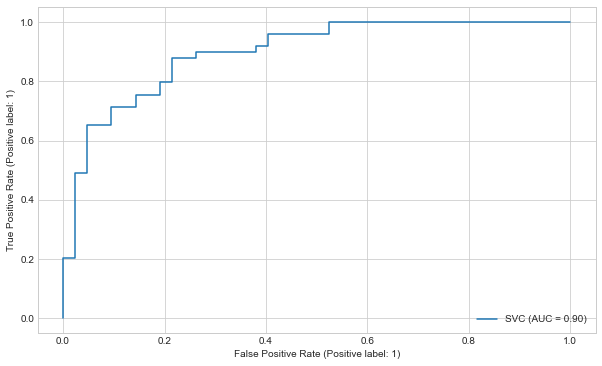

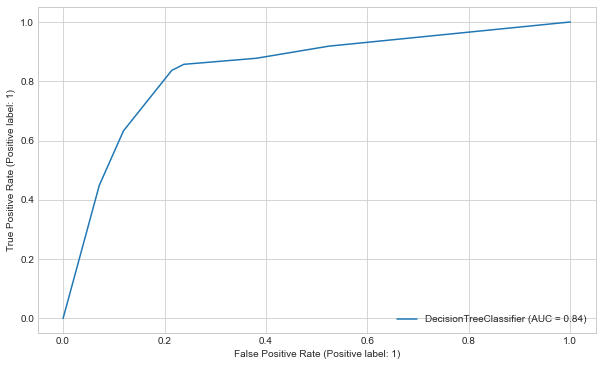

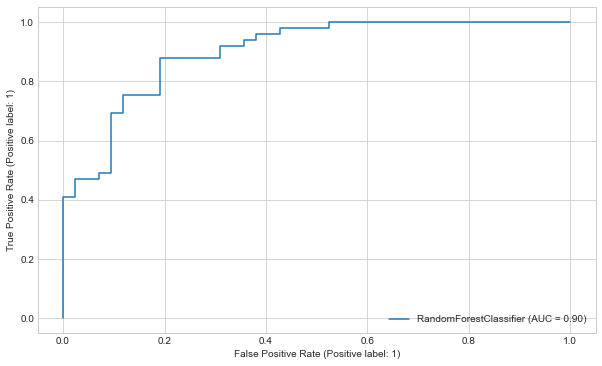

In [133]:
plot_roc_curve(svc_final_model, X_test, y_test)
plot_roc_curve(dt_final_model, X_test, y_test)
plot_roc_curve(rf_final_model, X_test, y_test)